In [1]:
import pandas as pd

# Read the Excel file (first sheet by default)
df = pd.read_excel("Batriatic_Project.xlsx")

# Write out to CSV (no index column)
df.to_csv("output.csv", index=False)


In [12]:
import pandas as pd

# Load the CSV dataset
df = pd.read_csv('output.csv')

# Display dataset shape and first 15 columns
print("Dataset shape (rows, columns):", df.shape)
print("First 15 column names:", df.columns.tolist()[:15])

Dataset shape (rows, columns): (344, 889)
First 15 column names: ['id', 'capture_date', 'doctor', 'procedure_category', 'form_date', 'admission_id', 'hospitalDesc', 'hospital_wardDesc', 'days_since_admission', 'length_of_stay', 'gender', 'age', 'weight', 'height', 'bmi']


In [11]:
# Identify all complication-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]

# Create new dataset without the original complication columns
df_new = df.drop(columns=comp_cols)

# Add a single 'complication' column: 1 if any original comp column == 1, else 0
df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

# Display new dataset shape
print("New dataset shape (rows, columns):", df_new.shape)

# Show a sample of the new 'complication' column alongside the ID
# Show the first 10 rows of id and complication
print(df_new[['id', 'complication']].head(10))
print("First 15 column names:", df_new.columns.tolist())

New dataset shape (rows, columns): (344, 756)
      id  complication
0  45207             0
1    824             0
2  37253             1
3  40073             0
4   1616             0
5  40501             0
6  38458             0
7  37531             0
8  46862             1
9  22775             0
First 15 column names: ['id', 'capture_date', 'doctor', 'procedure_category', 'form_date', 'admission_id', 'hospitalDesc', 'hospital_wardDesc', 'days_since_admission', 'length_of_stay', 'gender', 'age', 'weight', 'height', 'bmi', 'ibw', 'ebw', 'surgical_hist_cnt', 'family_hist_cnt', 'chronic_meds_cnt', 'cm_count', 'morbidity', 'CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_SMOKE', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS',

Boxplots of LOS age weigth height bmi ibw ebw

<Figure size 640x480 with 0 Axes>

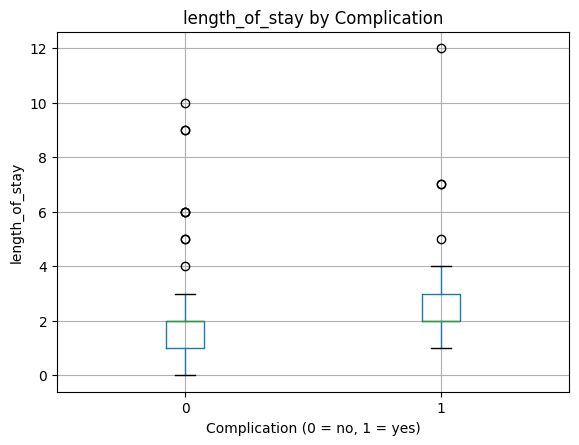

<Figure size 640x480 with 0 Axes>

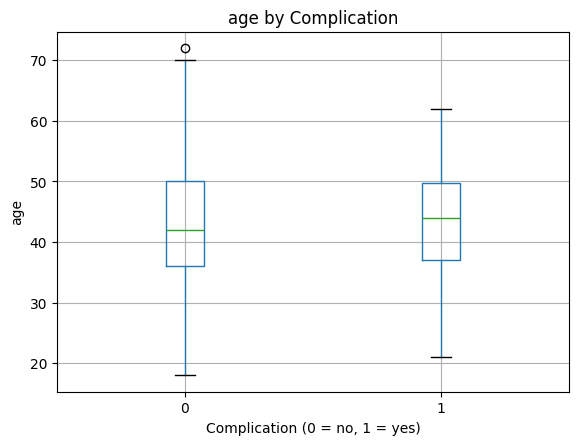

<Figure size 640x480 with 0 Axes>

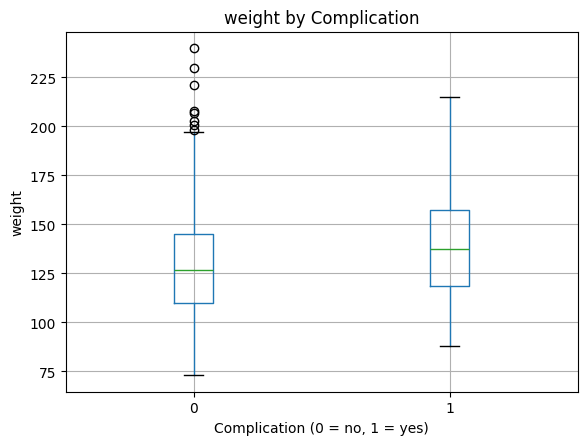

<Figure size 640x480 with 0 Axes>

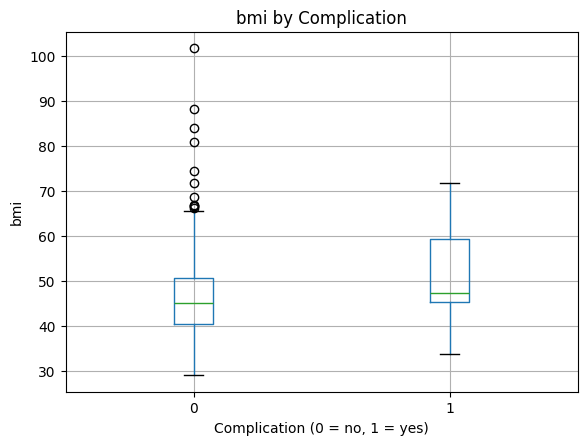

<Figure size 640x480 with 0 Axes>

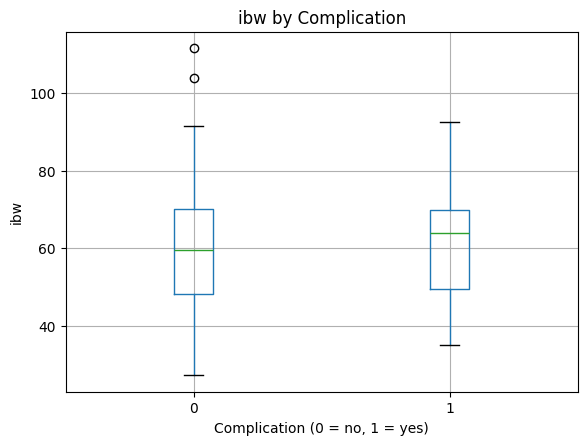

<Figure size 640x480 with 0 Axes>

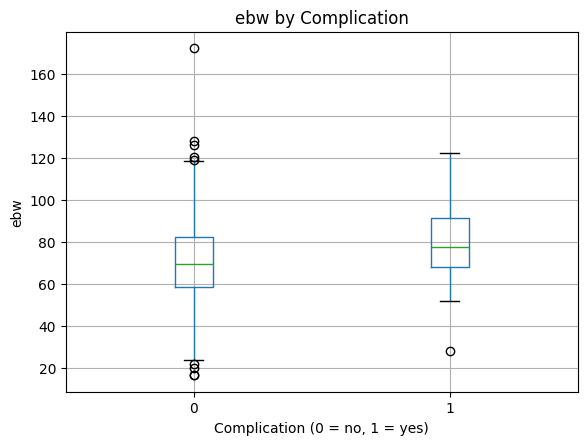

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume df_new is already built, with your single 'complication' column ---
# If you need to re-create:
# df = pd.read_csv('output.csv')
# comp_cols = [c for c in df.columns if 'comp' in c.lower()]
# df_new = df.drop(columns=comp_cols)
# df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

numeric_vars = ['length_of_stay', 'age', 'weight', 'bmi', 'ibw', 'ebw']


# 1) Numeric variables: one box for ‘0’ vs ‘1’ complication
for var in numeric_vars:
    plt.figure()
    df_new.boxplot(column=var, by='complication')
    plt.title(f'{var} by Complication')
    plt.suptitle('')
    plt.xlabel('Complication (0 = no, 1 = yes)')
    plt.ylabel(var)
    plt.show()





In [ ]:
import pandas as pd

# 1) Load your data
df = pd.read_csv('output.csv')  # or wherever your CSV lives

# 2) Recreate df_new (with single 'complication' column) if you haven’t already
comp_cols = [c for c in df.columns if 'comp' in c.lower()]
df_new = df.drop(columns=comp_cols)
df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

# 3) Print value counts for each
print("Gender counts:")
print(df_new['gender'].value_counts(), "\n")

print("Hospital counts:")
print(df_new['hospitalDesc'].value_counts(), "\n")

print("Ward counts:")
print(df_new['hospital_wardDesc'].value_counts())







Gender counts:
gender
Female    293
Male       51
Name: count, dtype: int64 

Hospital counts:
hospitalDesc
Zuid Afrikaans                  211
Mediclinic Medforum Hospital    112
Netcare Montana Hospital         17
Life Groenkloof                   3
Name: count, dtype: int64 

Ward counts:
hospital_wardDesc
Ward C          209
Surgical ICU     95
Ward FG          14
Ward 1            8
MICU              6
St Theresa        3
Medical ICU       3
Ward 3            2
Unknown           1
CICU              1
SICU              1
MICU HC           1
Name: count, dtype: int64

=== gender ===
complication  No Complication  Complication
gender                                     
Female                    262            31
Male                       48             3

=== hospitalDesc ===
complication                  No Complication  Complication
hospitalDesc                                               
Life Groenkloof                             3             0
Mediclinic Medforum Hospital 

<Figure size 640x480 with 0 Axes>

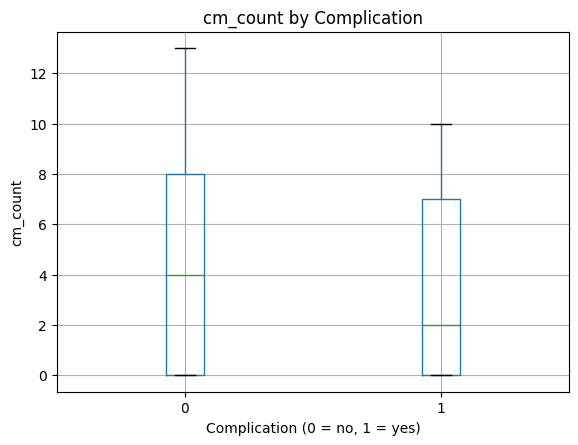

<Figure size 640x480 with 0 Axes>

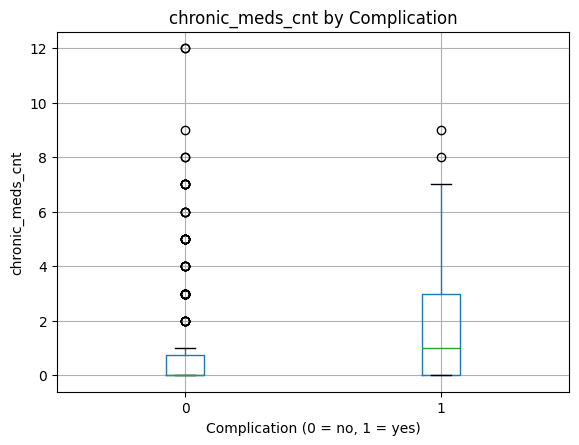

<Figure size 640x480 with 0 Axes>

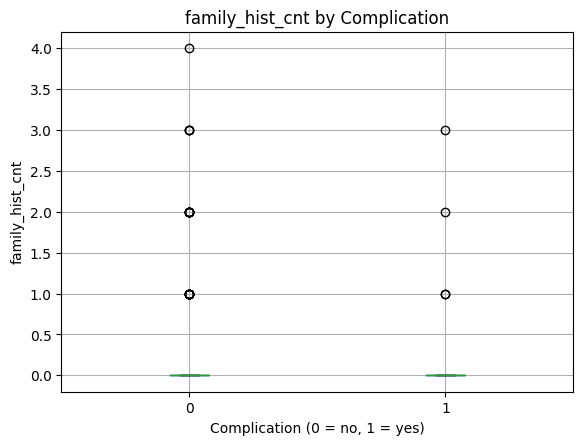

<Figure size 640x480 with 0 Axes>

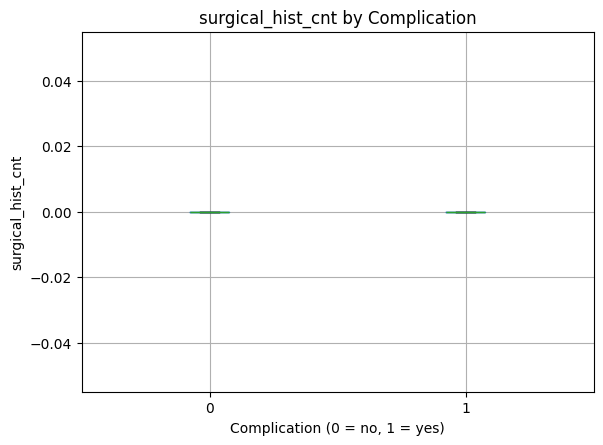

<Figure size 640x480 with 0 Axes>

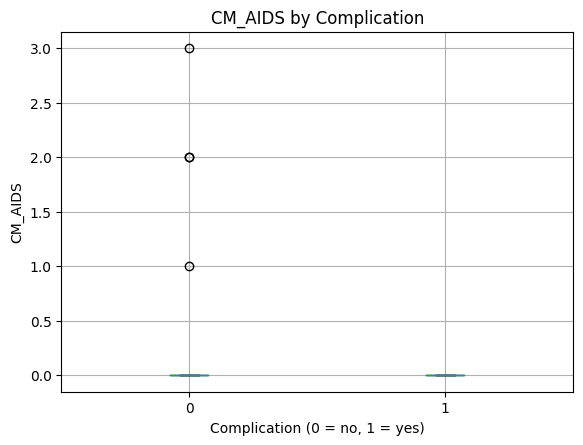

<Figure size 640x480 with 0 Axes>

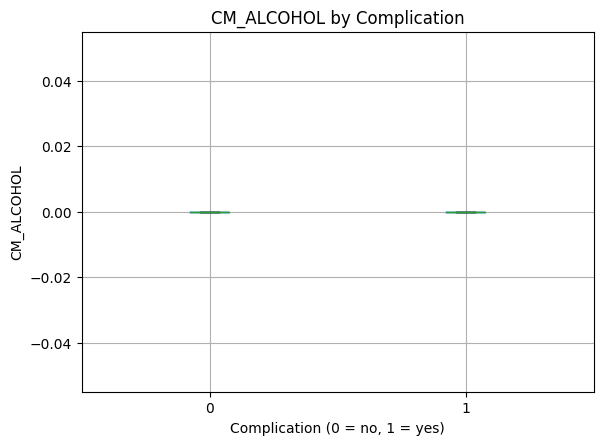

<Figure size 640x480 with 0 Axes>

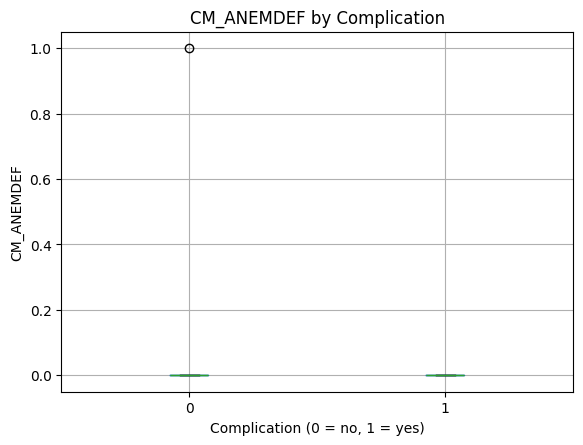

<Figure size 640x480 with 0 Axes>

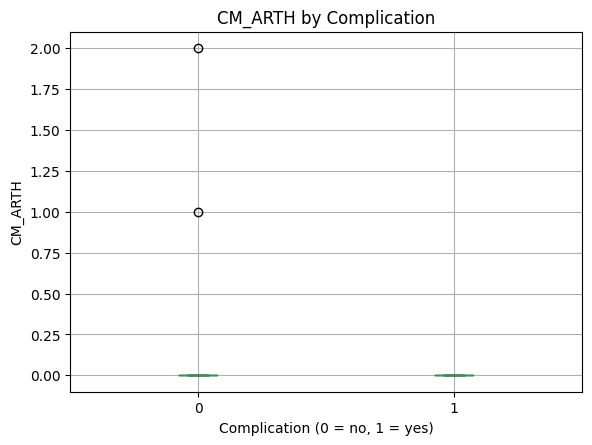

<Figure size 640x480 with 0 Axes>

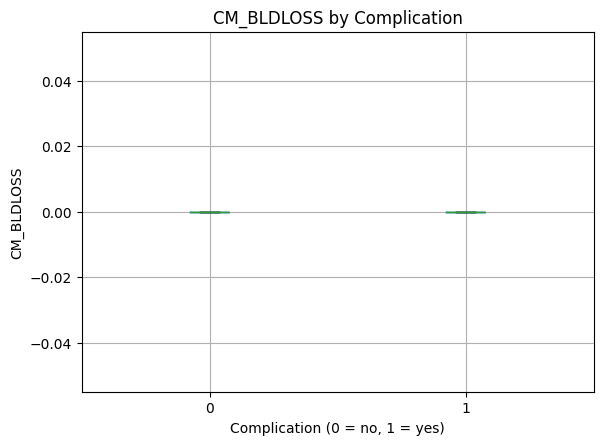

<Figure size 640x480 with 0 Axes>

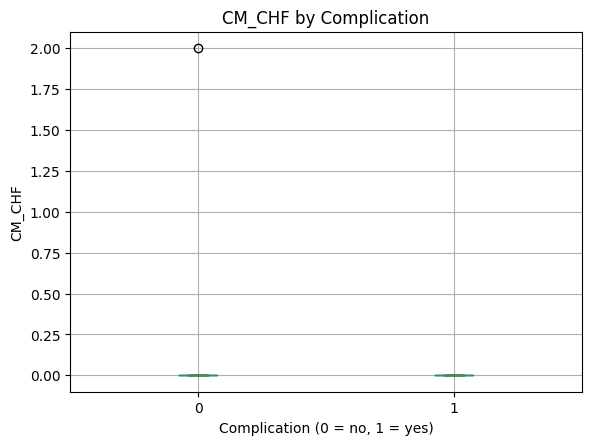

<Figure size 640x480 with 0 Axes>

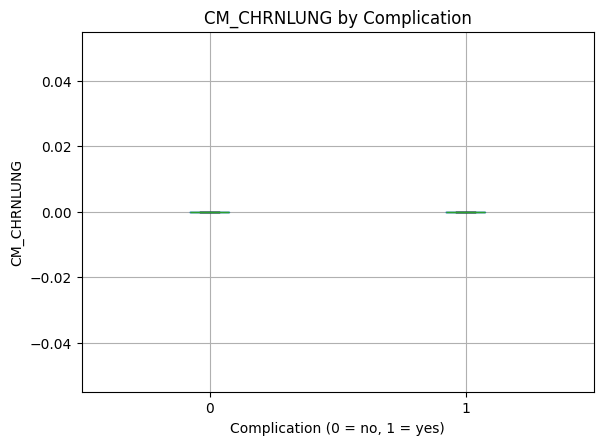

<Figure size 640x480 with 0 Axes>

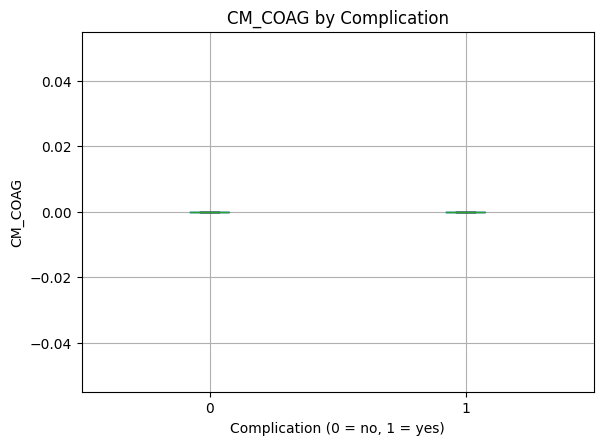

<Figure size 640x480 with 0 Axes>

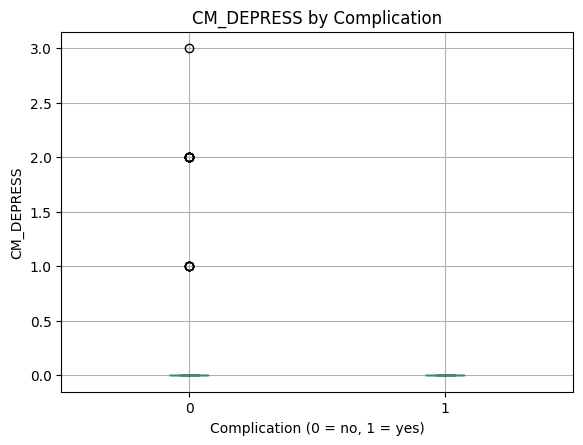

<Figure size 640x480 with 0 Axes>

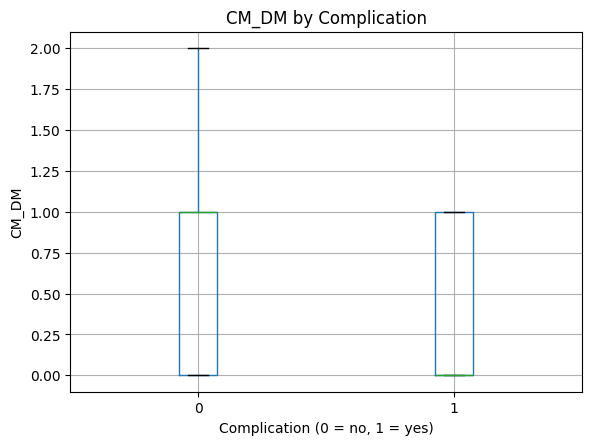

<Figure size 640x480 with 0 Axes>

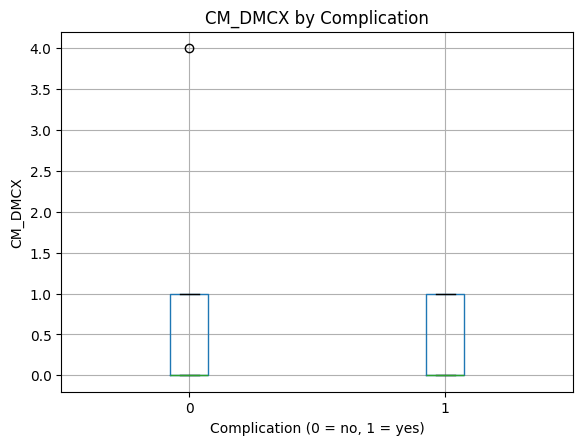

<Figure size 640x480 with 0 Axes>

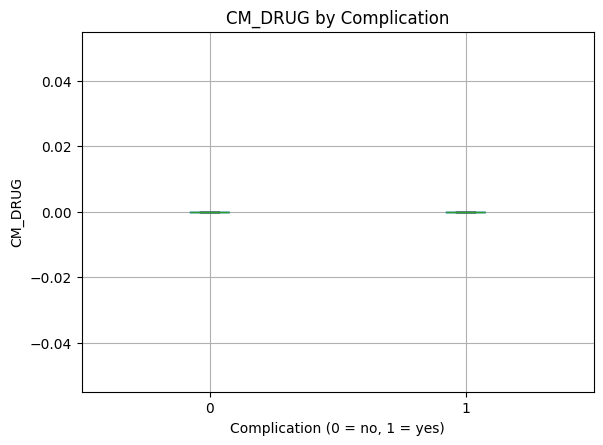

<Figure size 640x480 with 0 Axes>

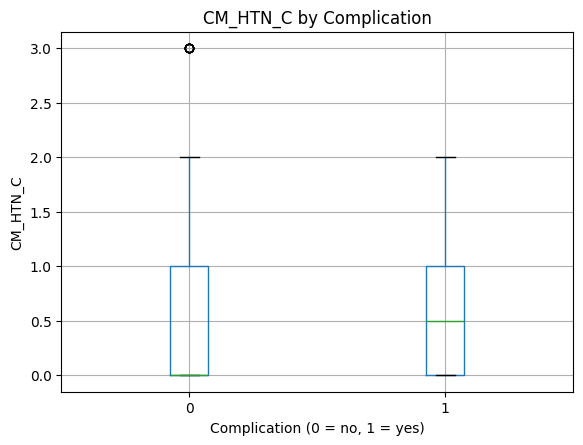

<Figure size 640x480 with 0 Axes>

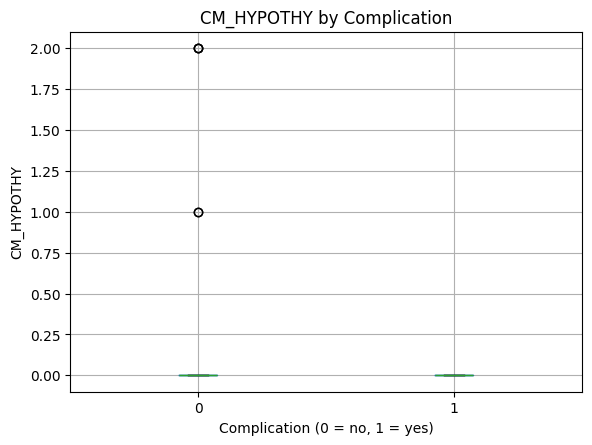

<Figure size 640x480 with 0 Axes>

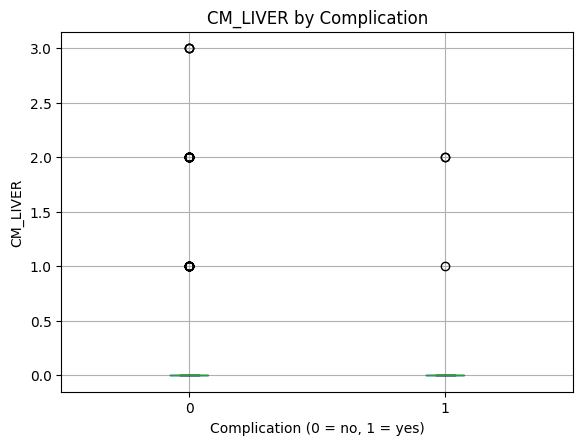

<Figure size 640x480 with 0 Axes>

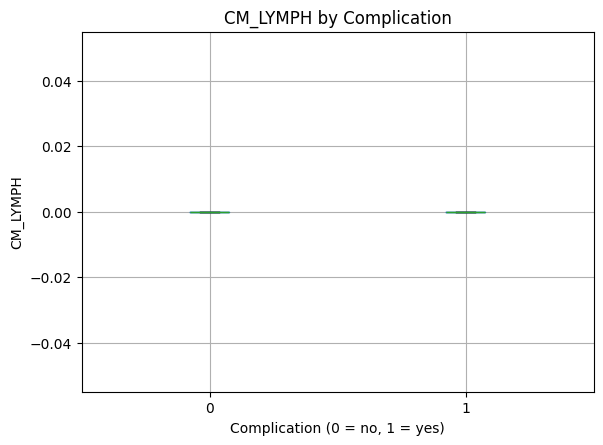

<Figure size 640x480 with 0 Axes>

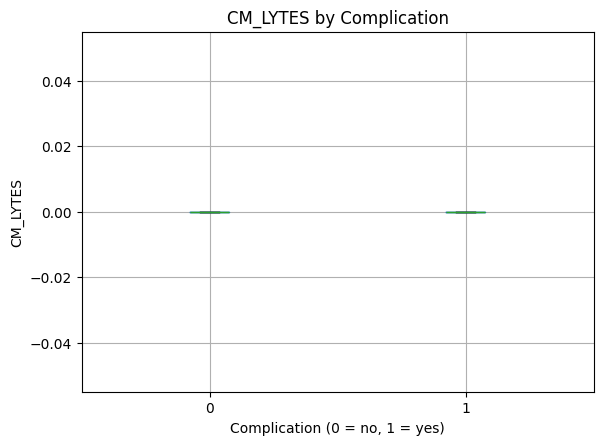

<Figure size 640x480 with 0 Axes>

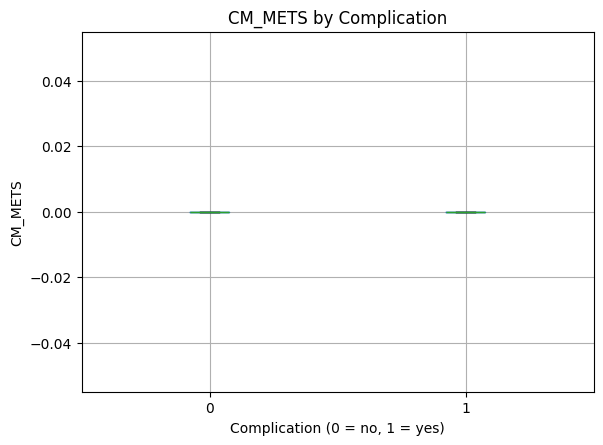

<Figure size 640x480 with 0 Axes>

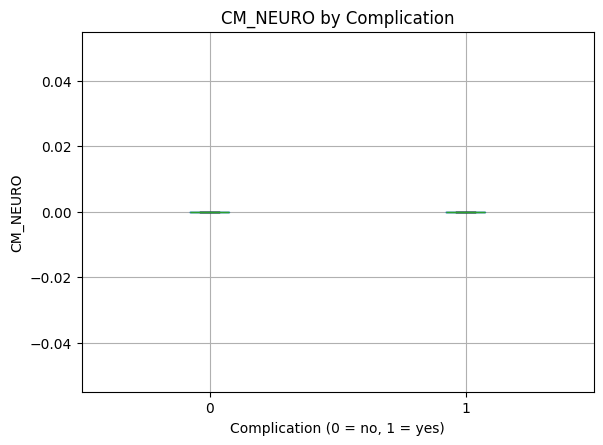

<Figure size 640x480 with 0 Axes>

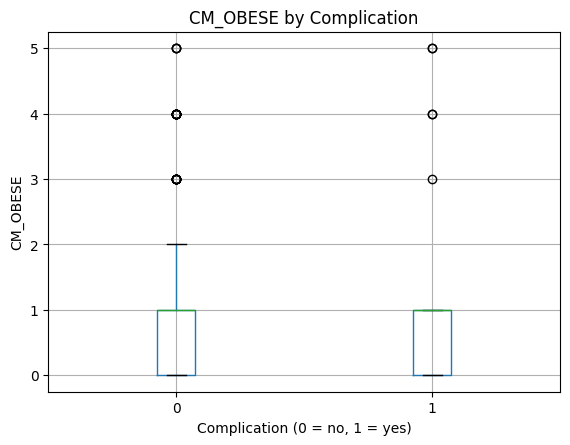

<Figure size 640x480 with 0 Axes>

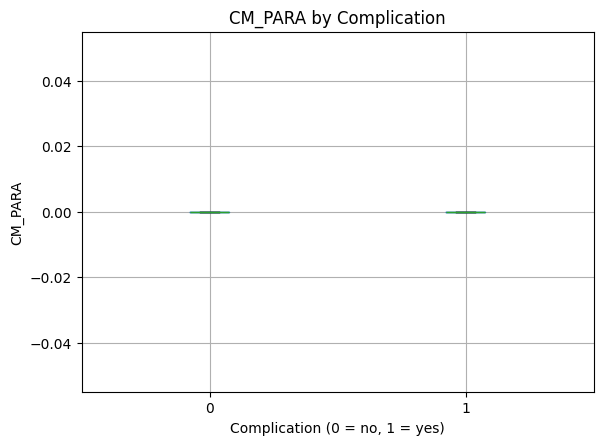

<Figure size 640x480 with 0 Axes>

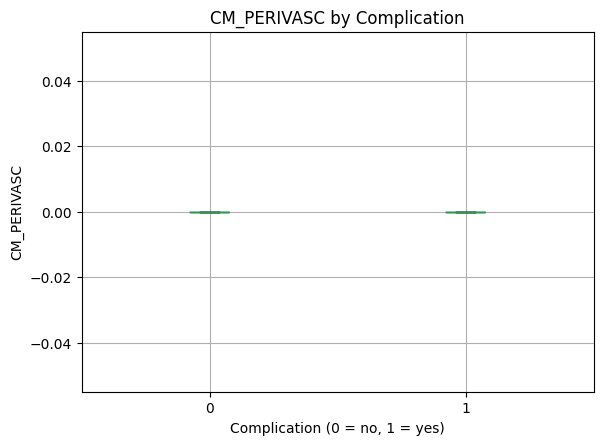

<Figure size 640x480 with 0 Axes>

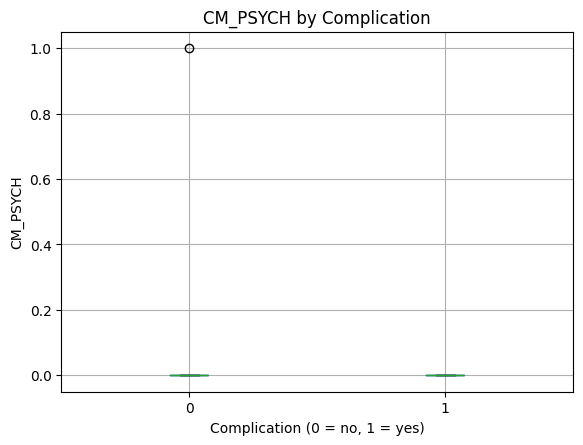

<Figure size 640x480 with 0 Axes>

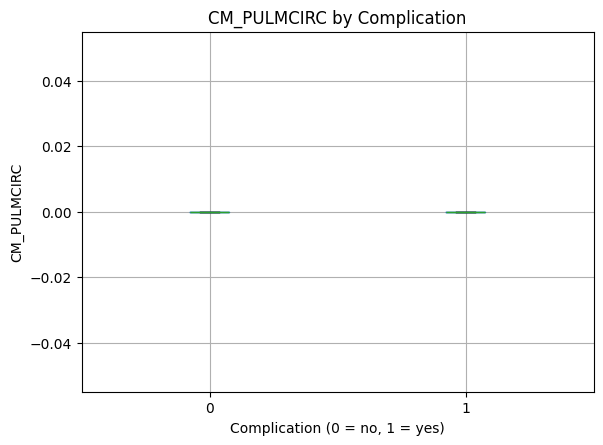

<Figure size 640x480 with 0 Axes>

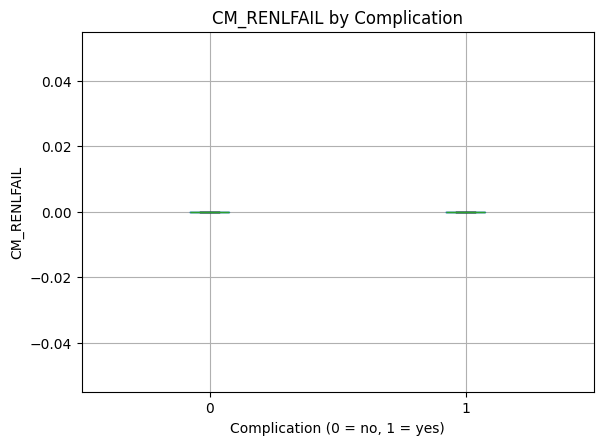

<Figure size 640x480 with 0 Axes>

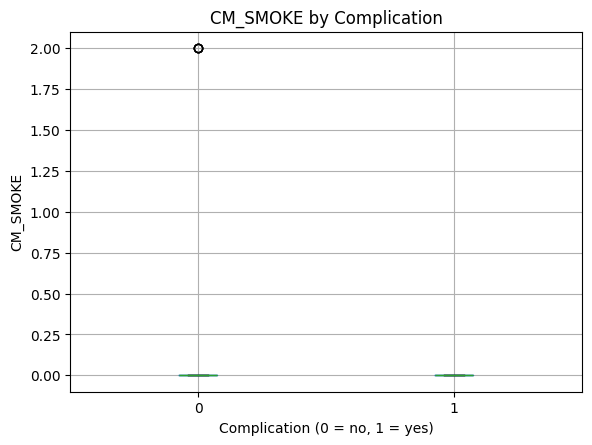

<Figure size 640x480 with 0 Axes>

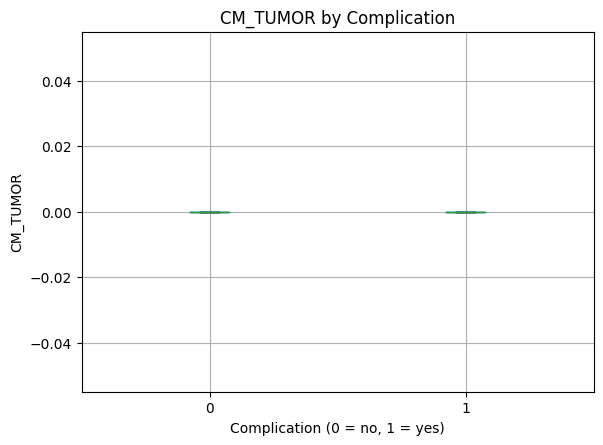

<Figure size 640x480 with 0 Axes>

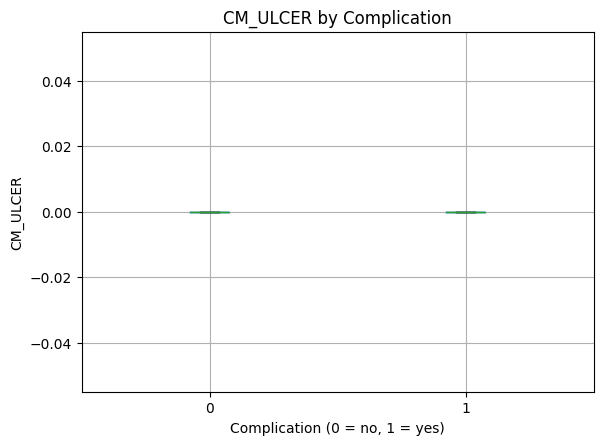

<Figure size 640x480 with 0 Axes>

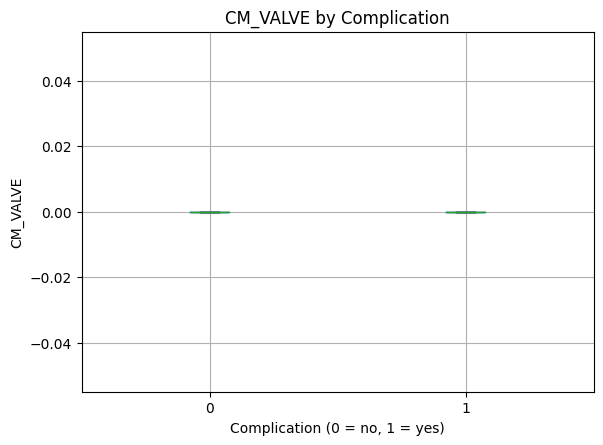

<Figure size 640x480 with 0 Axes>

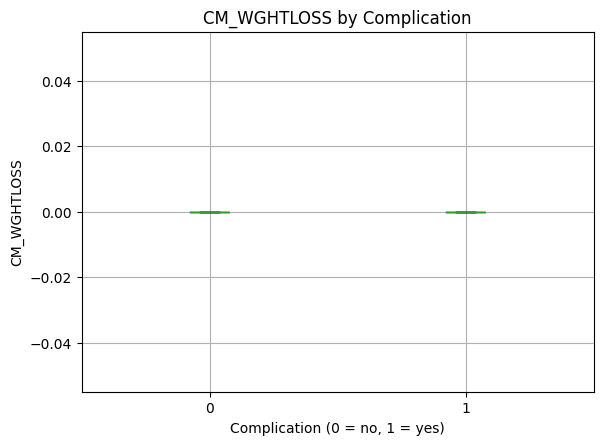

<Figure size 640x480 with 0 Axes>

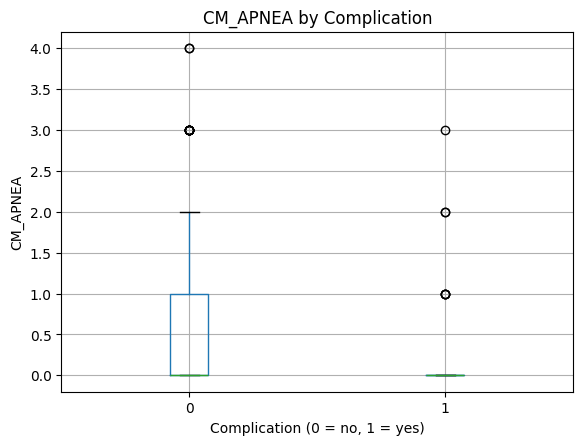

<Figure size 640x480 with 0 Axes>

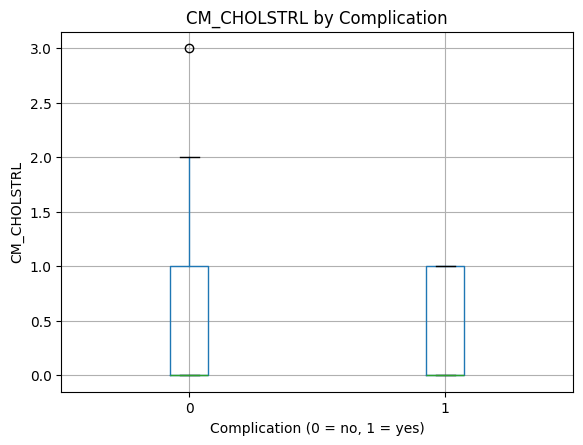

<Figure size 640x480 with 0 Axes>

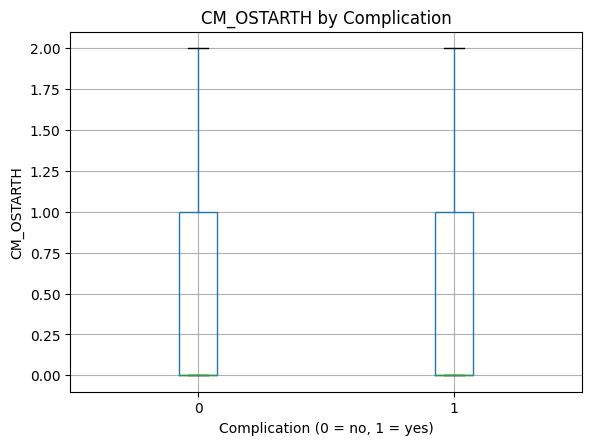

<Figure size 640x480 with 0 Axes>

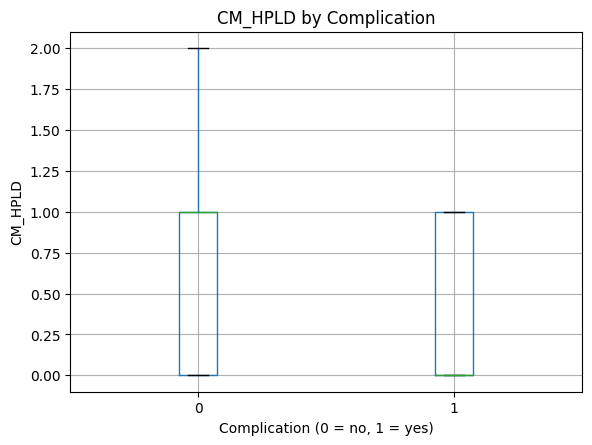

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume df_new is already built, with your single 'complication' column ---
# If you need to re-create:
# df = pd.read_csv('output.csv')
# comp_cols = [c for c in df.columns if 'comp' in c.lower()]
# df_new = df.drop(columns=comp_cols)
# df_new['complication'] = (df[comp_cols] == 1).any(axis=1).astype(int)

numeric_vars = ['cm_count', 'chronic_meds_cnt', 'family_hist_cnt', 'surgical_hist_cnt', 'CM_AIDS', 'CM_ALCOHOL','CM_ANEMDEF','CM_ARTH','CM_BLDLOSS','CM_CHF','CM_CHRNLUNG','CM_COAG','CM_DEPRESS','CM_DM','CM_DMCX','CM_DRUG','CM_HTN_C','CM_HYPOTHY','CM_LIVER','CM_LYMPH','CM_LYTES','CM_METS','CM_NEURO',"CM_OBESE","CM_PARA","CM_PERIVASC","CM_PSYCH",'CM_PULMCIRC','CM_RENLFAIL','CM_SMOKE','CM_TUMOR','CM_ULCER','CM_VALVE','CM_WGHTLOSS','CM_APNEA','CM_CHOLSTRL','CM_OSTARTH','CM_HPLD',]


# 1) Numeric variables: one box for ‘0’ vs ‘1’ complication
for var in numeric_vars:
    plt.figure()
    df_new.boxplot(column=var, by='complication')
    plt.title(f'{var} by Complication')
    plt.suptitle('')
    plt.xlabel('Complication (0 = no, 1 = yes)')
    plt.ylabel(var)
    plt.show()





In [20]:

# 3) Crosstab for each category
for var in ['gender', 'hospitalDesc', 'hospital_wardDesc']:
    ct = pd.crosstab(df_new[var], df_new['complication'], dropna=False)
    ct = ct.rename(columns={0: 'No Complication', 1: 'Complication'})
    print(f'\n=== {var} ===')
    print(ct)


=== gender ===
complication  No Complication  Complication
gender                                     
Female                    262            31
Male                       48             3

=== hospitalDesc ===
complication                  No Complication  Complication
hospitalDesc                                               
Life Groenkloof                             3             0
Mediclinic Medforum Hospital              110             2
Netcare Montana Hospital                   17             0
Zuid Afrikaans                            179            32
NaN                                         1             0

=== hospital_wardDesc ===
complication       No Complication  Complication
hospital_wardDesc                               
CICU                             1             0
MICU                             6             0
MICU HC                          1             0
Medical ICU                      3             0
SICU                             1           

First Model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (cross_val_score, StratifiedKFold, GridSearchCV, 
                                   cross_val_predict, LeaveOneOut, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                           make_scorer, f1_score, roc_auc_score, precision_recall_curve, 
                           auc, recall_score, precision_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

def analyze_dataset_characteristics(df_new):
    """
    Analyze dataset to recommend appropriate CV strategy and preprocessing
    """
    df_clean = df_new.fillna(0)
    
    if 'complication' not in df_clean.columns:
        raise ValueError("Target column 'complication' not found in dataset")
    
    X = df_clean.drop('complication', axis=1)
    y = df_clean['complication']
    
    total_samples = len(df_clean)
    class_counts = y.value_counts()
    minority_class_size = class_counts.min()
    imbalance_ratio = class_counts.max() / minority_class_size
    
    print("="*60)
    print("DATASET CHARACTERISTICS ANALYSIS")
    print("="*60)
    print(f"Total samples: {total_samples}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = (count/total_samples)*100
        print(f"  Class {class_val}: {count} samples ({percentage:.1f}%)")
    print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
    print(f"Minority class size: {minority_class_size}")
    
    # Recommendations
    print("\n" + "="*60)
    print("RECOMMENDATIONS")
    print("="*60)
    
    if total_samples < 100:
        recommended_cv = "Leave-One-Out or 10-fold CV"
        recommended_folds = min(10, total_samples)
    elif total_samples < 500:
        recommended_cv = "10-fold CV"
        recommended_folds = 10
    else:
        recommended_cv = "5-10 fold CV"
        recommended_folds = 5
    
    print(f"Recommended CV strategy: {recommended_cv}")
    print(f"Recommended folds: {recommended_folds}")
    
    if imbalance_ratio > 3:
        print("⚠️  High class imbalance detected!")
        print("Recommendations:")
        print("  - Use class weighting in models")
        print("  - Consider SMOTE for oversampling")
        print("  - Focus on F1-score, AUC-ROC, not just accuracy")
        print("  - Use stratified cross-validation")
    
    if minority_class_size < 20:
        print("⚠️  Very small minority class!")
        print("  - Be extra careful about overfitting")
        print("  - Consider simpler models")
        print("  - Use nested CV for hyperparameter tuning")
    
    return {
        'total_samples': total_samples,
        'minority_class_size': minority_class_size,
        'imbalance_ratio': imbalance_ratio,
        'recommended_folds': recommended_folds,
        'X': X,
        'y': y
    }

def enhanced_model_training(df_new, use_hyperparameter_tuning=True, use_smote=True, cv_folds=10, 
                          optimize_for_recall=False, min_recall_threshold=0.70):
    """
    Enhanced model training with hyperparameter tuning and imbalance handling
    
    Parameters:
    df_new: DataFrame with 'complication' target
    use_hyperparameter_tuning: Whether to use GridSearchCV/RandomizedSearchCV
    use_smote: Whether to apply SMOTE oversampling
    cv_folds: Number of CV folds (auto-determined if None)
    optimize_for_recall: If True, optimize specifically for high recall
    min_recall_threshold: Minimum recall threshold when optimize_for_recall=True
    """
    
    # Analyze dataset first
    analysis = analyze_dataset_characteristics(df_new)
    
    X = analysis['X']
    y = analysis['y']
    total_samples = analysis['total_samples']
    minority_class_size = analysis['minority_class_size']
    
    # Determine CV strategy
    if cv_folds is None:
        cv_folds = analysis['recommended_folds']
    
    # For very small datasets, consider Leave-One-Out
    if total_samples < 50:
        cv_strategy = LeaveOneOut()
        print(f"Using Leave-One-Out CV due to small dataset size ({total_samples} samples)")
    else:
        cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        print(f"Using {cv_folds}-fold Stratified CV")
    
    # Handle categorical variables
    categorical_cols = X.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"Encoding categorical columns: {list(categorical_cols)}")
        le = LabelEncoder()
        for col in categorical_cols:
            X[col] = le.fit_transform(X[col].astype(str))
    
    # Prepare models with class balancing
    models = {}
    
    # Define scoring metric and parameters based on optimization goal
    if optimize_for_recall:
        print(f"\n🎯 OPTIMIZING FOR HIGH RECALL (≥{min_recall_threshold*100}%)")
        print("="*60)
        
        # Custom scorer that prioritizes recall
        def high_recall_scorer(y_true, y_pred):
            recall = recall_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)
            # Weighted score: 60% recall, 40% F1
            return 0.6 * recall + 0.4 * f1
        
        primary_metric = make_scorer(high_recall_scorer)
        metric_name = 'high_recall_score'
        
        # High recall parameter configurations
        if use_hyperparameter_tuning and minority_class_size >= 10:
            rf_params = {
                'classifier__n_estimators': [200, 300, 500],
                'classifier__max_depth': [5, 7, 10, None],  # Deeper for more recall
                'classifier__min_samples_split': [2, 3],     # Lower values
                'classifier__min_samples_leaf': [1, 2],      # Lower values
                'classifier__class_weight': ['balanced_subsample'],  # More aggressive
                'classifier__max_features': [0.3, 0.5, 0.7, 'sqrt']
            }
            
            lr_params = {
                'classifier__C': [0.01, 0.1, 0.5, 1, 5],    # Lower C for less regularization
                'classifier__class_weight': ['balanced'],
                'classifier__solver': ['liblinear', 'lbfgs']
            }
            
            svm_params = {
                'classifier__C': [0.1, 0.5, 1, 5, 10],      # Lower C for softer margins
                'classifier__kernel': ['rbf', 'poly'],
                'classifier__gamma': ['scale', 0.01, 0.1, 1],
                'classifier__class_weight': ['balanced']
            }
        else:
            # Simpler grids for small datasets
            rf_params = {
                'classifier__n_estimators': [200, 300],
                'classifier__max_depth': [5, 7, None],
                'classifier__class_weight': ['balanced_subsample']
            }
            
            lr_params = {
                'classifier__C': [0.1, 1, 5],
                'classifier__class_weight': ['balanced']
            }
            
            svm_params = {
                'classifier__C': [1, 5],
                'classifier__class_weight': ['balanced']
            }
    
    else:
        # Standard F1 optimization
        primary_metric = 'f1'
        metric_name = 'f1'
        
        # Standard parameter configurations
        if use_hyperparameter_tuning and minority_class_size >= 10:
            rf_params = {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [2, 3, 4, 5, 7, None],
                'classifier__min_samples_split': [1, 2, 3, 5, 10],
                'classifier__min_samples_leaf': [1, 2, 4],
                'classifier__class_weight': ['balanced', 'balanced_subsample']
            }
            
            lr_params = {
                'classifier__C': [0.01, 0.1, 1, 10, 100],
                'classifier__class_weight': ['balanced', None],
                'classifier__solver': ['liblinear', 'lbfgs']
            }
            
            svm_params = {
                'classifier__C': [0.01, 0.1, 1, 10],
                'classifier__kernel': ['rbf', 'linear'],
                'classifier__class_weight': ['balanced', None]
            }
        else:
            # Simpler grids for small datasets
            rf_params = {
                'classifier__n_estimators': [50, 100],
                'classifier__max_depth': [3, 5, None],
                'classifier__class_weight': ['balanced']
            }
            
            lr_params = {
                'classifier__C': [0.1, 1, 10],
                'classifier__class_weight': ['balanced']
            }
            
            svm_params = {
                'classifier__C': [1, 10],
                'classifier__class_weight': ['balanced']
            }
    
    # Create base models
    rf_base = RandomForestClassifier(random_state=42)
    lr_base = LogisticRegression(random_state=42, max_iter=10000)
    svm_base = SVC(random_state=42, probability=True)
    
    # Add Gradient Boosting for high recall optimization
    if optimize_for_recall:
        gb_base = GradientBoostingClassifier(random_state=42)
        gb_params = {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [4, 5, 6],
            'classifier__learning_rate': [0.05, 0.1, 0.15],
            'classifier__subsample': [0.9, 1.0],
            'classifier__min_samples_split': [2, 3],
            'classifier__min_samples_leaf': [1, 2]
        }
    
    # Create pipelines with optional SMOTE/ADASYN
    scaler = StandardScaler()
    
    # Choose sampling strategy
    if optimize_for_recall:
        sampling_method = ADASYN(random_state=42, n_neighbors=min(5, minority_class_size-1))
        sampling_name = "ADASYN"
    else:
        sampling_method = SMOTE(random_state=42, k_neighbors=min(5, minority_class_size-1))
        sampling_name = "SMOTE"
    
    if use_smote and minority_class_size >= 5:
        print(f"Using {sampling_name} for oversampling")
        
        # Random Forest (doesn't need scaling)
        models['Random Forest'] = {
            'pipeline': ImbPipeline([
                (sampling_name.lower(), sampling_method),
                ('classifier', rf_base)
            ]),
            'params': rf_params
        }
        
        # Logistic Regression (needs scaling)
        models['Logistic Regression'] = {
            'pipeline': ImbPipeline([
                ('scaler', scaler),
                (sampling_name.lower(), sampling_method),
                ('classifier', lr_base)
            ]),
            'params': lr_params
        }
        
        # SVM (needs scaling)
        models['SVM'] = {
            'pipeline': ImbPipeline([
                ('scaler', scaler),
                (sampling_name.lower(), sampling_method),
                ('classifier', svm_base)
            ]),
            'params': svm_params
        }
        
        # Add Gradient Boosting for recall optimization
        if optimize_for_recall:
            models['Gradient Boosting'] = {
                'pipeline': ImbPipeline([
                    (sampling_name.lower(), sampling_method),
                    ('classifier', gb_base)
                ]),
                'params': gb_params
            }
    else:
        print("Not using oversampling (insufficient minority samples or disabled)")
        
        # Random Forest
        models['Random Forest'] = {
            'pipeline': Pipeline([
                ('classifier', rf_base)
            ]),
            'params': rf_params
        }
        
        # Logistic Regression
        models['Logistic Regression'] = {
            'pipeline': Pipeline([
                ('scaler', scaler),
                ('classifier', lr_base)
            ]),
            'params': lr_params
        }
        
        # SVM
        models['SVM'] = {
            'pipeline': Pipeline([
                ('scaler', scaler),
                ('classifier', svm_base)
            ]),
            'params': svm_params
        }
        
        if optimize_for_recall:
            models['Gradient Boosting'] = {
                'pipeline': Pipeline([
                    ('classifier', gb_base)
                ]),
                'params': gb_params
            }
    
    # Define scoring metrics appropriate for imbalanced data
    scoring_metrics = {
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }
    
    results = {}
    high_recall_models = {}
    
    print("\n" + "="*60)
    print("MODEL TRAINING WITH HYPERPARAMETER TUNING")
    print("="*60)
    
    for name, model_info in models.items():
        print(f"\nTraining {name}...")
        
        if use_hyperparameter_tuning:
            # Use RandomizedSearchCV for better performance
            if optimize_for_recall:
                search = RandomizedSearchCV(
                    model_info['pipeline'],
                    model_info['params'],
                    n_iter=30,
                    cv=cv_strategy,
                    scoring=primary_metric,
                    n_jobs=-1,
                    random_state=42,
                    verbose=0
                )
            else:
                search = GridSearchCV(
                    model_info['pipeline'],
                    model_info['params'],
                    cv=cv_strategy,
                    scoring=primary_metric,
                    n_jobs=-1,
                    verbose=0
                )
            
            search.fit(X, y)
            best_model = search.best_estimator_
            best_params = search.best_params_
            
            print(f"Best parameters: {best_params}")
            print(f"Best {metric_name} score: {search.best_score_:.4f}")
            
        else:
            # Simple training without hyperparameter tuning
            best_model = model_info['pipeline']
            best_model.fit(X, y)
            
            # Get cross-validation score
            scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring=primary_metric)
            print(f"Mean {metric_name} score: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
        
        # Evaluate with multiple metrics
        print(f"\nCross-validation results for {name}:")
        metrics_results = {}
        for metric_name_eval, metric in scoring_metrics.items():
            try:
                scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring=metric)
                metrics_results[metric_name_eval] = scores.mean()
                print(f"  {metric_name_eval:10}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
            except Exception as e:
                print(f"  {metric_name_eval:10}: Error - {e}")
        
        # Check recall threshold if optimizing for recall
        recall_score_mean = metrics_results.get('recall', 0)
        meets_threshold = recall_score_mean >= min_recall_threshold if optimize_for_recall else True
        
        if optimize_for_recall:
            print(f"  {'✓' if meets_threshold else '✗'} Recall threshold ({min_recall_threshold*100}%): {'MET' if meets_threshold else 'NOT MET'}")
        
        results[name] = {
            'model': best_model,
            'best_params': best_params if use_hyperparameter_tuning else None,
            'metrics': metrics_results,
            'meets_recall_threshold': meets_threshold
        }
        
        if meets_threshold and optimize_for_recall:
            high_recall_models[name] = results[name]
    
    # Find best model
    print("\n" + "="*60)
    print("FINAL MODEL COMPARISON")
    print("="*60)
    
    if optimize_for_recall and high_recall_models:
        print(f"Models meeting {min_recall_threshold*100}% recall threshold:")
        
        # Sort by F1 score among models that meet recall threshold
        sorted_high_recall = sorted(high_recall_models.items(), 
                                  key=lambda x: x[1]['metrics'].get('f1', 0), reverse=True)
        
        for name, result in sorted_high_recall:
            metrics = result['metrics']
            print(f"✓ {name:20}: Recall={metrics.get('recall', 0):.3f}, F1={metrics.get('f1', 0):.3f}")
        
        if sorted_high_recall:
            best_model_name = sorted_high_recall[0][0]
            best_model = sorted_high_recall[0][1]['model']
            print(f"\n🎯 Best high-recall model: {best_model_name}")
            print(f"🎯 Recall: {sorted_high_recall[0][1]['metrics'].get('recall', 0):.3f}")
            print(f"🎯 F1: {sorted_high_recall[0][1]['metrics'].get('f1', 0):.3f}")
        else:
            print(f"❌ No models achieved {min_recall_threshold*100}% recall!")
            best_model_name = max(results.keys(), key=lambda x: results[x]['metrics'].get('recall', 0))
            best_model = results[best_model_name]['model']
            print(f"🔄 Best recall achieved: {results[best_model_name]['metrics'].get('recall', 0):.3f} by {best_model_name}")
    
    else:
        # Standard F1-based selection
        best_f1_scores = {}
        for name, result in results.items():
            f1_score_mean = result['metrics'].get('f1', 0)
            best_f1_scores[name] = f1_score_mean
            print(f"{name:20}: F1 = {f1_score_mean:.4f}")
        
        best_model_name = max(best_f1_scores.keys(), key=lambda x: best_f1_scores[x])
        best_model = results[best_model_name]['model']
        
        print(f"\n🏆 Best model: {best_model_name}")
        print(f"🏆 Best F1 score: {best_f1_scores[best_model_name]:.4f}")
    
    # Fit final model on full dataset
    best_model.fit(X, y)
    
    return {
        'results': results,
        'best_model': best_model,
        'best_model_name': best_model_name,
        'analysis': analysis,
        'cv_strategy': cv_strategy,
        'X': X,
        'y': y,
        'primary_metric': metric_name if 'metric_name' in locals() else 'f1',
        'high_recall_models': high_recall_models if optimize_for_recall else None,
        'optimize_for_recall': optimize_for_recall,
        'min_recall_threshold': min_recall_threshold
    }

def threshold_tuning_for_recall(model, X, y, cv_strategy, target_recall=0.70):
    """
    Tune prediction threshold to achieve target recall
    """
    print(f"\nTuning prediction threshold for {target_recall*100}% recall...")
    
    # Get prediction probabilities using cross-validation
    y_pred_proba = cross_val_predict(model, X, y, cv=cv_strategy, method='predict_proba')[:, 1]
    
    # Test different thresholds
    thresholds = np.arange(0.1, 0.9, 0.05)
    results = []
    
    for threshold in thresholds:
        y_pred_thresh = (y_pred_proba >= threshold).astype(int)
        
        try:
            recall = recall_score(y, y_pred_thresh)
            precision = precision_score(y, y_pred_thresh) if len(np.unique(y_pred_thresh)) > 1 else 0
            f1 = f1_score(y, y_pred_thresh) if len(np.unique(y_pred_thresh)) > 1 else 0
            
            results.append({
                'threshold': threshold,
                'recall': recall,
                'precision': precision,
                'f1': f1
            })
        except:
            continue
    
    # Find thresholds that meet recall requirement
    valid_thresholds = [r for r in results if r['recall'] >= target_recall]
    
    if valid_thresholds:
        # Among valid thresholds, pick the one with highest F1
        best_threshold_result = max(valid_thresholds, key=lambda x: x['f1'])
        
        print(f"✓ Found threshold {best_threshold_result['threshold']:.2f} achieving:")
        print(f"  Recall: {best_threshold_result['recall']:.3f}")
        print(f"  Precision: {best_threshold_result['precision']:.3f}")
        print(f"  F1-Score: {best_threshold_result['f1']:.3f}")
        
        return best_threshold_result
    else:
        # Find the threshold that gets closest to target recall
        closest_result = max(results, key=lambda x: x['recall'])
        print(f"❌ Could not achieve {target_recall*100}% recall")
        print(f"   Best achievable recall: {closest_result['recall']:.3f} at threshold {closest_result['threshold']:.2f}")
        
        return closest_result

def detailed_evaluation(training_results):
    """
    Comprehensive evaluation including confusion matrix and detailed metrics
    """
    best_model = training_results['best_model']
    best_model_name = training_results['best_model_name']
    cv_strategy = training_results['cv_strategy']
    X = training_results['X']
    y = training_results['y']
    
    print("="*60)
    print(f"DETAILED EVALUATION: {best_model_name.upper()}")
    print("="*60)
    
    # Get cross-validation predictions
    y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
    y_pred_proba = cross_val_predict(best_model, X, y, cv=cv_strategy, method='predict_proba')[:, 1]
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Detailed metrics for binary classification
    if len(np.unique(y)) == 2:
        tn, fp, fn, tp = cm.ravel()
        
        print(f"\nDetailed Breakdown:")
        print(f"True Negatives (TN):  {tn:4d}")
        print(f"False Positives (FP): {fp:4d}")  
        print(f"False Negatives (FN): {fn:4d}")
        print(f"True Positives (TP):  {tp:4d}")
        
        # Calculate metrics manually
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        
        print(f"\nKey Metrics:")
        print(f"Accuracy:     {accuracy:.4f}")
        print(f"Precision:    {precision:.4f}")
        print(f"Recall:       {recall:.4f}")
        print(f"Specificity:  {specificity:.4f}")
        print(f"F1-Score:     {f1:.4f}")
        
        # AUC-ROC
        try:
            auc_roc = roc_auc_score(y, y_pred_proba)
            print(f"AUC-ROC:      {auc_roc:.4f}")
        except:
            print("AUC-ROC: Not available")
    
    # Classification report
    print(f"\n" + "="*60)
    print("CLASSIFICATION REPORT")
    print("="*60)
    print(classification_report(y, y_pred))
    
    # Threshold tuning recommendation
    if training_results.get('optimize_for_recall', False):
        current_recall = recall
        target_recall = training_results.get('min_recall_threshold', 0.70)
        
        if current_recall < target_recall:
            print(f"\n🎯 THRESHOLD TUNING RECOMMENDATION")
            print("="*60)
            print(f"Current recall ({current_recall:.3f}) is below target ({target_recall:.3f})")
            print("Consider running threshold tuning:")
            print(f"threshold_result = threshold_tuning_for_recall(best_model, X, y, cv_strategy, {target_recall})")
    
    return {
        'confusion_matrix': cm,
        'y_true': y,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba if len(np.unique(y)) == 2 else None
    }

# Usage Instructions
print("="*60)
print("ENHANCED MODEL TRAINING WITH HIGH RECALL OPTIMIZATION")
print("="*60)
print("\nUsage:")
print("1. Analyze your dataset:")
print("   analysis = analyze_dataset_characteristics(df_new)")
print("\n2. Standard training (optimizes F1):")
print("   results = enhanced_model_training(df_new)")
print("\n3. HIGH RECALL training (optimizes for ≥70% recall):")
print("   results = enhanced_model_training(df_new, optimize_for_recall=True, min_recall_threshold=0.70)")
print("\n4. Detailed evaluation:")
print("   evaluation = detailed_evaluation(results)")
print("\n5. Threshold tuning if recall is still too low:")
print("   threshold_result = threshold_tuning_for_recall(results['best_model'], results['X'], results['y'], results['cv_strategy'])")
print("\nMake sure your dataset has a 'complication' column as target.")

# Example usage for HIGH RECALL:
print("\n" + "="*50)
print("RECOMMENDED FOR YOUR USE CASE (70% RECALL)")
print("="*50)
print("results = enhanced_model_training(df_new, optimize_for_recall=True, min_recall_threshold=0.70)")

# Standard training (uncomment to run):
results = enhanced_model_training(df_new, use_hyperparameter_tuning=True, use_smote=True, cv_folds=10)

# High recall training (uncomment to run):
results = enhanced_model_training(df_new, optimize_for_recall=True, min_recall_threshold=0.70)

ENHANCED MODEL TRAINING READY!

Usage:
1. Analyze your dataset:
   analysis = analyze_dataset_characteristics(df_new)

2. Train models:
   results = enhanced_model_training(df_new)

3. Detailed evaluation:
   evaluation = detailed_evaluation(results)

Make sure your dataset has a 'complication' column as target.
DATASET CHARACTERISTICS ANALYSIS
Total samples: 344
Number of features: 755
Class distribution:
  Class 0: 310 samples (90.1%)
  Class 1: 34 samples (9.9%)
Imbalance ratio: 9.12:1
Minority class size: 34

RECOMMENDATIONS
Recommended CV strategy: 10-fold CV
Recommended folds: 10
⚠️  High class imbalance detected!
Recommendations:
  - Use class weighting in models
  - Consider SMOTE for oversampling
  - Focus on F1-score, AUC-ROC, not just accuracy
  - Use stratified cross-validation
Using 10-fold Stratified CV
Encoding categorical columns: ['capture_date', 'doctor', 'procedure_category', 'form_date', 'hospitalDesc', 'hospital_wardDesc', 'gender', 'surgeon', 'assistant', 'second_

In [45]:
evaluation = detailed_evaluation(results)

DETAILED EVALUATION: SVM

Confusion Matrix:
[[282  28]
 [ 19  15]]

Detailed Breakdown:
True Negatives (TN):   282
False Positives (FP):   28
False Negatives (FN):   19
True Positives (TP):    15

Key Metrics:
Accuracy:     0.8634
Precision:    0.3488
Recall:       0.4412
Specificity:  0.9097
F1-Score:     0.3896
AUC-ROC:      0.7475

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       310
           1       0.35      0.44      0.39        34

    accuracy                           0.86       344
   macro avg       0.64      0.68      0.66       344
weighted avg       0.88      0.86      0.87       344



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (cross_val_score, StratifiedKFold, GridSearchCV, 
                                   cross_val_predict, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           make_scorer, f1_score, roc_auc_score, precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

def advanced_feature_engineering(X, y, method='auto', n_features=None):
    """
    Advanced feature selection and dimensionality reduction
    """
    print(f"Original feature count: {X.shape[1]}")
    
    if method == 'auto':
        # Auto-select based on dataset size
        if X.shape[1] > X.shape[0]:  # More features than samples
            method = 'select_k_best'
            n_features = min(X.shape[0] // 2, 100)
        else:
            method = 'rfe'
            n_features = min(X.shape[1] // 2, 200)
    
    if n_features is None:
        n_features = min(X.shape[1] // 3, 150)
    
    X_processed = X.copy()
    
    if method == 'select_k_best':
        print(f"Using SelectKBest with {n_features} features")
        selector = SelectKBest(score_func=f_classif, k=n_features)
        X_processed = selector.fit_transform(X_processed, y)
        feature_selector = selector
        
    elif method == 'rfe':
        print(f"Using RFE with RandomForest, selecting {n_features} features")
        rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
        selector = RFE(estimator=rf, n_features_to_select=n_features)
        X_processed = selector.fit_transform(X_processed, y)
        feature_selector = selector
        
    elif method == 'tree_based':
        print(f"Using tree-based feature selection with {n_features} features")
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        rf.fit(X_processed, y)
        selector = SelectFromModel(rf, max_features=n_features)
        X_processed = selector.fit_transform(X_processed, y)
        feature_selector = selector
        
    elif method == 'pca':
        print(f"Using PCA with {n_features} components")
        # Scale first for PCA
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_processed)
        selector = PCA(n_components=n_features, random_state=42)
        X_processed = selector.fit_transform(X_scaled)
        feature_selector = (scaler, selector)
    
    print(f"Reduced to {X_processed.shape[1] if len(X_processed.shape) > 1 else X_processed.shape[0]} features")
    
    return X_processed, feature_selector

def get_advanced_sampling_strategies():
    """
    Get various sampling strategies for imbalanced data
    """
    return {
        'SMOTE': SMOTE(random_state=42, k_neighbors=min(5, 34-1)),  # Adjust k_neighbors for small minority class
        'ADASYN': ADASYN(random_state=42, n_neighbors=min(5, 34-1)),
        'BorderlineSMOTE': BorderlineSMOTE(random_state=42, k_neighbors=min(5, 34-1)),
        'SMOTEENN': SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=min(5, 34-1))),
        'SMOTETomek': SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=min(5, 34-1))),
    }

def get_advanced_models():
    """
    Get advanced models suitable for imbalanced classification
    """
    models = {}
    
    # XGBoost - excellent for imbalanced data
    models['XGBoost'] = {
        'model': xgb.XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            tree_method='hist',
            enable_categorical=False
        ),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 4, 5, 6],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__scale_pos_weight': [3],  # For imbalanced data
            'classifier__subsample': [0.8, 0.9, 1.0],
            'classifier__colsample_bytree': [0.8, 0.9, 1.0]
        },
        'needs_scaling': False
    }
    
    # LightGBM - fast and effective
    models['LightGBM'] = {
        'model': lgb.LGBMClassifier(
            random_state=42,
            verbosity=-1,
            force_col_wise=True
        ),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 4, 5, 6],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__class_weight': ['balanced', None],
            'classifier__subsample': [0.8, 0.9, 1.0],
            'classifier__colsample_bytree': [0.8, 0.9, 1.0]
        },
        'needs_scaling': False
    }
    
    # Extra Trees - good for high-dimensional data
    models['Extra Trees'] = {
        'model': ExtraTreesClassifier(
            random_state=42,
            class_weight='balanced'
        ),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, 7, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['sqrt', 'log2', None]
        },
        'needs_scaling': False
    }
    
    # Gradient Boosting
    models['Gradient Boosting'] = {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 4, 5],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__subsample': [0.8, 0.9, 1.0]
        },
        'needs_scaling': False
    }
    
    # Calibrated Random Forest
    models['Calibrated RF'] = {
        'model': CalibratedClassifierCV(
            RandomForestClassifier(
                random_state=42,
                class_weight='balanced_subsample',
                n_estimators=100
            ),
            method='isotonic',
            cv=3
        ),
        'params': {
            'classifier__base_estimator__max_depth': [3, 5, 7],
            'classifier__base_estimator__min_samples_split': [2, 5, 10],
            'classifier__base_estimator__min_samples_leaf': [1, 2, 4]
        },
        'needs_scaling': False
    }
    
    # Improved SVM
    models['SVM RBF'] = {
        'model': SVC(
            random_state=42,
            probability=True,
            class_weight='balanced'
        ),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
            'classifier__kernel': ['rbf']
        },
        'needs_scaling': True
    }
    
    # Improved Logistic Regression with ElasticNet
    models['ElasticNet LR'] = {
        'model': LogisticRegression(
            random_state=42,
            penalty='elasticnet',
            solver='saga',
            class_weight='balanced',
            max_iter=5000
        ),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        'needs_scaling': True
    }
    
    return models

def advanced_model_training(df_new, 
                          feature_selection_method='auto',
                          n_features=None,
                          sampling_strategy='SMOTE',
                          use_randomized_search=True,
                          cv_folds=10,
                          n_iter_search=50):
    """
    Advanced model training with multiple strategies
    """
    
    # Basic preprocessing
    df_clean = df_new.fillna(0)
    X = df_clean.drop('complication', axis=1)
    y = df_clean['complication']
    
    # Handle categorical variables
    categorical_cols = X.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"Encoding {len(categorical_cols)} categorical columns...")
        le = LabelEncoder()
        for col in categorical_cols:
            X[col] = le.fit_transform(X[col].astype(str))
    
    print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Class distribution: {y.value_counts().to_dict()}")
    
    # Feature engineering
    X_processed, feature_selector = advanced_feature_engineering(X, y, feature_selection_method, n_features)
    
    # Convert to DataFrame if needed
    if not isinstance(X_processed, pd.DataFrame):
        X_processed = pd.DataFrame(X_processed)
    
    # Cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # Get sampling strategies and models
    sampling_strategies = get_advanced_sampling_strategies()
    models = get_advanced_models()
    
    # Select sampling strategy
    if sampling_strategy in sampling_strategies:
        sampler = sampling_strategies[sampling_strategy]
        print(f"Using {sampling_strategy} for oversampling")
    else:
        sampler = None
        print("No oversampling")
    
    results = {}
    
    print("\n" + "="*80)
    print("ADVANCED MODEL TRAINING")
    print("="*80)
    
    for name, model_info in models.items():
        print(f"\nTraining {name}...")
        
        try:
            # Build pipeline
            pipeline_steps = []
            
            # Add scaling if needed
            if model_info['needs_scaling']:
                pipeline_steps.append(('scaler', RobustScaler()))
            
            # Add sampling if specified
            if sampler is not None:
                pipeline_steps.append(('sampler', sampler))
            
            # Add classifier
            pipeline_steps.append(('classifier', model_info['model']))
            
            # Create pipeline
            if sampler is not None:
                pipeline = ImbPipeline(pipeline_steps)
            else:
                pipeline = Pipeline(pipeline_steps)
            
            # Hyperparameter tuning
            if use_randomized_search and len(model_info['params']) > 0:
                search = RandomizedSearchCV(
                    pipeline,
                    model_info['params'],
                    n_iter=n_iter_search,
                    cv=cv_strategy,
                    scoring='f1',
                    n_jobs=-1,
                    random_state=42,
                    verbose=0
                )
                search.fit(X_processed, y)
                best_model = search.best_estimator_
                best_params = search.best_params_
                best_score = search.best_score_
                
                print(f"Best F1 score: {best_score:.4f}")
                print(f"Best parameters: {best_params}")
                
            else:
                # Simple training
                best_model = pipeline
                best_model.fit(X_processed, y)
                scores = cross_val_score(best_model, X_processed, y, cv=cv_strategy, scoring='f1')
                best_score = scores.mean()
                best_params = None
                
                print(f"F1 score: {best_score:.4f} (+/- {scores.std()*2:.4f})")
            
            # Comprehensive evaluation
            print(f"Cross-validation results for {name}:")
            metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
            for metric in metrics:
                try:
                    scores = cross_val_score(best_model, X_processed, y, cv=cv_strategy, scoring=metric)
                    print(f"  {metric:10}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
                except Exception as e:
                    print(f"  {metric:10}: Error calculating")
            
            results[name] = {
                'model': best_model,
                'f1_score': best_score,
                'best_params': best_params
            }
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue
    
    # Find best model
    if results:
        best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
        best_model = results[best_model_name]['model']
        best_f1 = results[best_model_name]['f1_score']
        
        print("\n" + "="*80)
        print("FINAL RESULTS SUMMARY")
        print("="*80)
        
        sorted_results = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)
        for name, result in sorted_results:
            print(f"{name:20}: F1 = {result['f1_score']:.4f}")
        
        print(f"\n🏆 Best model: {best_model_name}")
        print(f"🏆 Best F1 score: {best_f1:.4f}")
        
        # Fit final model
        best_model.fit(X_processed, y)
        
        return {
            'results': results,
            'best_model': best_model,
            'best_model_name': best_model_name,
            'X_processed': X_processed,
            'y': y,
            'feature_selector': feature_selector,
            'cv_strategy': cv_strategy
        }
    else:
        print("No models were successfully trained!")
        return None

def ensemble_predictions(training_results, top_n=3):
    """
    Create ensemble predictions from top N models
    """
    if training_results is None:
        return None
    
    results = training_results['results']
    X_processed = training_results['X_processed']
    y = training_results['y']
    cv_strategy = training_results['cv_strategy']
    
    # Get top N models
    sorted_models = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)
    top_models = sorted_models[:top_n]
    
    print(f"\nCreating ensemble from top {len(top_models)} models:")
    for name, result in top_models:
        print(f"  {name}: F1 = {result['f1_score']:.4f}")
    
    # Simple voting ensemble
    ensemble_predictions = np.zeros(len(y))
    ensemble_probabilities = np.zeros(len(y))
    
    for name, result in top_models:
        model = result['model']
        y_pred = cross_val_predict(model, X_processed, y, cv=cv_strategy)
        y_pred_proba = cross_val_predict(model, X_processed, y, cv=cv_strategy, method='predict_proba')[:, 1]
        
        ensemble_predictions += y_pred
        ensemble_probabilities += y_pred_proba
    
    # Average predictions
    ensemble_predictions = (ensemble_predictions >= len(top_models) / 2).astype(int)
    ensemble_probabilities = ensemble_probabilities / len(top_models)
    
    # Calculate ensemble metrics
    from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
    
    ensemble_f1 = f1_score(y, ensemble_predictions)
    ensemble_accuracy = accuracy_score(y, ensemble_predictions)
    ensemble_precision = precision_score(y, ensemble_predictions)
    ensemble_recall = recall_score(y, ensemble_predictions)
    ensemble_auc = roc_auc_score(y, ensemble_probabilities)
    
    print(f"\nEnsemble Results:")
    print(f"Accuracy:  {ensemble_accuracy:.4f}")
    print(f"Precision: {ensemble_precision:.4f}")
    print(f"Recall:    {ensemble_recall:.4f}")
    print(f"F1-Score:  {ensemble_f1:.4f}")
    print(f"AUC-ROC:   {ensemble_auc:.4f}")
    
    return {
        'predictions': ensemble_predictions,
        'probabilities': ensemble_probabilities,
        'f1_score': ensemble_f1,
        'top_models': top_models
    }

# Example usage
print("="*80)
print("ADVANCED MODEL TRAINING READY!")
print("="*80)
print("\nRecommended usage for your high-dimensional, imbalanced dataset:")
print("\n1. Basic run with feature selection:")
print("   results = advanced_model_training(df_new, feature_selection_method='select_k_best', n_features=100)")
print("\n2. Try different sampling strategies:")
print("   results = advanced_model_training(df_new, sampling_strategy='BorderlineSMOTE')")
print("\n3. Create ensemble:")
print("   ensemble = ensemble_predictions(results, top_n=3)")
print("\n4. For your dataset specifically:")
print("   # High dimensionality + small sample size")
print("   results = advanced_model_training(df_new, ")
print("                                   feature_selection_method='tree_based',")
print("                                   n_features=50,")
print("                                   sampling_strategy='BorderlineSMOTE',")
print("                                   use_randomized_search=True)")

# Uncomment to run:
results = advanced_model_training(df_new, 
                                feature_selection_method='tree_based',
                                n_features=50,
                                 sampling_strategy='BorderlineSMOTE',
                                 use_randomized_search=True)
 
if results:
     ensemble = ensemble_predictions(results, top_n=3)

ADVANCED MODEL TRAINING READY!

Recommended usage for your high-dimensional, imbalanced dataset:

1. Basic run with feature selection:
   results = advanced_model_training(df_new, feature_selection_method='select_k_best', n_features=100)

2. Try different sampling strategies:
   results = advanced_model_training(df_new, sampling_strategy='BorderlineSMOTE')

3. Create ensemble:
   ensemble = ensemble_predictions(results, top_n=3)

4. For your dataset specifically:
   # High dimensionality + small sample size
   results = advanced_model_training(df_new, 
                                   feature_selection_method='tree_based',
                                   n_features=50,
                                   sampling_strategy='BorderlineSMOTE',
                                   use_randomized_search=True)
Encoding 111 categorical columns...
Dataset: 344 samples, 755 features
Class distribution: {0: 310, 1: 34}
Original feature count: 755
Using tree-based feature selection with 50 feat